<a href="https://colab.research.google.com/github/Techrobo/ML_Project/blob/main/Assignment10_Msc_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 10: X-Ray Pneumonia Detection (M.Sc Students)

==> Submitted by  
* *Shubham Gupta* 
* *3506475* 
* *Infotech*
* M.Sc.
--------
* *Sakshi Shukla* 
* *3522187* 
* *Computational Linguistics*
* M.Sc.
--------
* *Chaitanya Nair* 
* *3508415* 
* *Infotech*
* M.Sc.
---------
* *Tuo Zhang* 
* *3517325* 
* *Computational Linguistics*
* M.Sc.

In this assignment, you are tasked with developing your own classifier for pneumonia in X-ray images. You will go through to the complete ML development cycle from loading and preprocessing your data to evaluating your models.

Extract the X-Ray dataset https://rssiste.sharepoint.com/:u:/s/analyticcomputing/ERMTk8Wm091Crev9tV0NEBUBv7ue3bRSG8iiftCCjbOKhA?e=UcjaFB to the same directory as your Jupyter notebook. The data is already split into a training, validation, and testing set. The dataset originates from the paper [Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning
](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5).

You may use any packages, we encountered during the exercises (numpy, matplotlib, scikit-learn, scikit-image, pandas, pytorch) as well as the Python standard library.

You should (at least) address the following points in your development process:

- The dataset is imbalanced. Do at least one of the following:
    - Augment your dataset by including rotated, flipped, or brightened images. This will also improve the generalization capabilities of your model.
    - or: Modify your objective function by weighting the classes differently.
- Optimize the hyperparameters of your models using grid-search or random-search on the validation set.
- Consider at least two classes of models, e.g. CNN and SVM. At least one of your model classes should be some type of neural network implemented in PyTorch.
- After the hyperparameter optimization, select the best-performing models of each class. Evaluate these models on the testing data and visualize your results.

Points (200):

    1. Model Definitions and Training : 80
    2. Model Evaluations : 80
    3. Data Augmentation and Hyperparameter Searching : 40

*Note*! 

This assignment scores (200) counts in 60% threshold (from all 10 assignment, including this project) to be passed for exam. If you already have enough scores then you are not obliged to complete this project (i.e. you already have more than 60% of ALL scores from previous assignment, again, including this project). Otherwise you should do this assignments that it provide double of usual points (200); thus it can increase the overall submisson score. 

For example, if you have more than 660 points out of 1100 total (900-previous assignment + 200-this assignment), then you do not have to perform the assignment . You can consult all of your accumulated points in Illias.


You have two weeks to complete this assignment.

**Note for the Tutor :** We have made three classification models namely :


1. SVM 
2. CNN with 6 Layers
3. CNN with 11 Layer

We have used different approach in each model and kept them independent of each other from the complete ML development cycle from loading and preprocessing your data to evaluating your models




#**SVM MODEL USING HOG FEATURE EXTRACTION**

> In this model , After the Data Augumentaion , the features of image data are extracted using the technique of Histogram of Oriented Gradients (HOG) . Then We have classified the image using SVM imported from SKLearn Library and then applied grid search to optimize and find the best performing hyperparamenter . Ultimately, Accuracy of model is evaluated on the Test Set and results are inferrred as confusion matrix.

---



> References Used :

https://www.machinecurve.com/index.php/2020/05/03/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn/#full-and-final-model-code

https://github.com/starhopp3r/PyTorch-SVM/blob/master/SVM%20-%20PyTorch.ipynb

https://github.com/Mohammed-Deifallah/Pneumonia-Detection

https://github.com/AnupamMicrosoft/PyTorch-Classification/blob/master/Linear%20Support%20Vector%20Machines.py

https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://github.com/vikasyadav87500/Image_Classification_SVM/blob/master/Image-Classification(SVM).ipynb

https://www.analyticsvidhya.com/blog/2021/06/build-an-image-classifier-with-svm/






In [2]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
# Determine the locations of auxiliary libraries and datasets.
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/MyDrive/Colab Notebooks/Dataset-Pneumonia/chest_xray")
    
    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"
    import sys
    sys.path.insert(0, str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path("Dataset-Pneumonia/chest_xray")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imgaug
import imgaug.augmenters as iaa

##*Data Loading*

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200

def load_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_ind = labels.index(label)
        for img in os.listdir(path):
            try:
                img_raw = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_res = cv2.resize(img_raw, (img_size, img_size))
                data.append([img_res, class_ind])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = load_data(f"{AUX_DATA_ROOT}/train")
test = load_data(f"{AUX_DATA_ROOT}/test")
val = load_data(f"{AUX_DATA_ROOT}/val") #Total time to load in collab is 27 mins 38 sec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


## Data Augmentation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


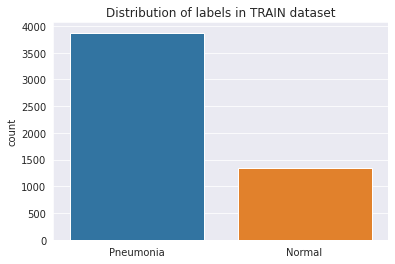

In [ ]:
l = []
for t in train:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in TRAIN dataset")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


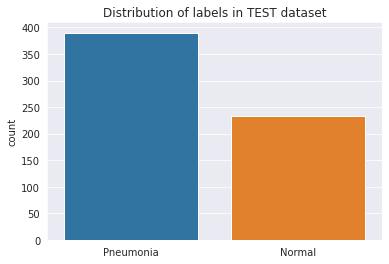

In [ ]:
l = []
for t in test:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in TEST dataset")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


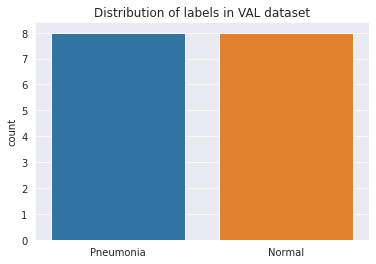

In [ ]:
l = []
for t in val:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in VAL dataset")
plt.show()

In [ ]:
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=10), # roatation
    iaa.Multiply((1.1, 1.4))]) #random brightness

### Train

In [ ]:
train_normal=0
train_pn=0

for t in train:
    if(t[1] == 0):
        train_pn+=1
    else:
        train_normal+=1

new_imgs_train = []

for or_img, lab in train:
  if train_normal+1>train_pn:
    break
  if lab==0:
    continue
  else:
    aug_img1 = seq.augment_image(or_img)
    aug_img2 = seq.augment_image(or_img)
    new_imgs_train.append([aug_img1,lab])
    new_imgs_train.append([aug_img2,lab])
    train_normal+=2

In [ ]:
len(new_imgs_train)

2534

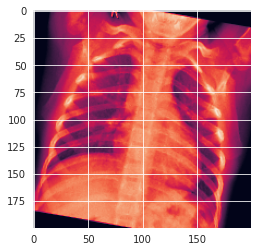

In [ ]:
plt.imshow(new_imgs_train[10][0])
plt.show()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


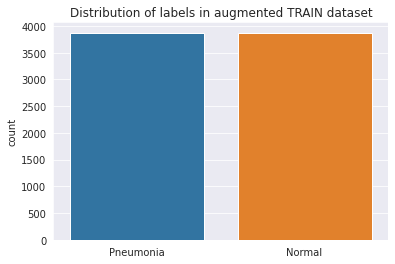

In [ ]:
train_aug = np.append(train, new_imgs_train,0)

l = []
for t in train_aug:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in augmented TRAIN dataset")
plt.show()

### Test

In [ ]:
test_normal=0
test_pn=0

for t in test:
    if(t[1] == 0):
        test_pn+=1
    else:
        test_normal+=1

new_imgs_test = []

for or_img, lab in test:
  if test_normal+1>test_pn:
    break
  if lab==0:
    continue
  else:
    aug_img1 = seq.augment_image(or_img)
    aug_img2 = seq.augment_image(or_img)
    new_imgs_test.append([aug_img1,lab])
    new_imgs_test.append([aug_img2,lab])
    test_normal+=2

In [ ]:
len(new_imgs_test)

156

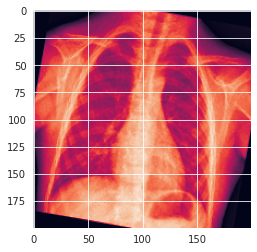

In [ ]:
plt.imshow(new_imgs_test[10][0])
plt.show()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


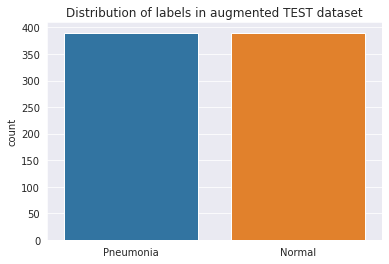

In [ ]:
test_aug = np.append(test, new_imgs_test,0)

l = []
for t in test_aug:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in augmented TEST dataset")
plt.show()

### Val

In [ ]:
new_imgs_val = []

for or_img, lab in val:
  aug_img1 = seq.augment_image(or_img)
  aug_img2 = seq.augment_image(or_img)
  new_imgs_val.append([aug_img1,lab])
  new_imgs_val.append([aug_img2,lab])

In [ ]:
len(new_imgs_val)

32

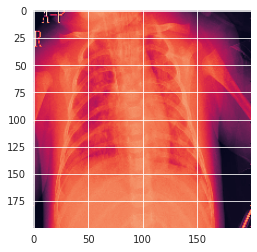

In [ ]:
plt.imshow(new_imgs_val[10][0])
plt.show()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


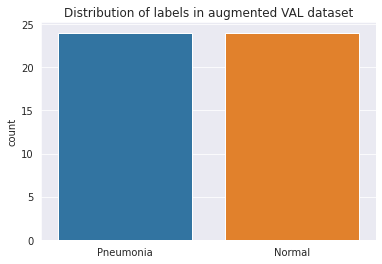

In [ ]:
val_aug = np.append(val, new_imgs_val,0)

l = []
for t in val_aug:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in augmented VAL dataset")
plt.show()

## HOG feature extraction

In [ ]:
from skimage.transform import resize
from skimage.feature import hog

In [ ]:
train_aug_hog=train_aug.copy()

In [ ]:
for t in train_aug_hog:
  t[0] = resize(t[0], (128,64))

In [ ]:
train_aug_hog[0][0].shape

(128, 64)

In [ ]:
new_boxes=[]
for b in train_aug_hog:
    df = hog(b[0],orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)#, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    new_boxes.append(df)
hog_features_aug_train = np.array(new_boxes, 'float64')

In [ ]:
test_aug_hog=test_aug.copy()

In [ ]:
for t in test_aug:
  t[0] = resize(t[0], (128,64))

In [ ]:
new_boxes=[]
for b in test_aug:
    df = hog(b[0],orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)#, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    new_boxes.append(df)
hog_features_aug_test = np.array(new_boxes, 'float64')

In [ ]:
hog_features_aug_train.shape

(7750, 3780)

## SVM Model

> From sklearn library



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
clf = SVC()

In [ ]:
labels_aug_train=[]
for t in train_aug_hog:
  labels_aug_train.append(t[1])


In [ ]:
labels_aug_test=[]
for t in test_aug_hog:
  labels_aug_test.append(t[1])

###Grid Search for Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=2, verbose=10, n_jobs=-1)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(kernel="linear"), param_grid, cv=2, verbose=20, n_jobs=-1) 
#Adjust the value of cv to 3 or 5 for more better performace but takes more time as the task count increases

grid_search.fit(hog_features_aug_train, labels_aug_train)  #takes 10 minutes in collab
print("Accuracy on test set: {:.2f}".format(grid_search.score(hog_features_aug_test, labels_aug_test)))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  4

Accuracy on test set: 0.72


In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.001}

In [ ]:
best_hog_aug_svc = grid_search.best_estimator_

###Acccuracy of SVM Model on Test Set

In [ ]:
labels_hog_aug_pred = best_hog_aug_svc.predict(hog_features_aug_test)
print(accuracy_score(labels_aug_test,labels_hog_aug_pred))

0.7205128205128205


###Confusion Matrix of SVM

<Figure size 432x288 with 0 Axes>

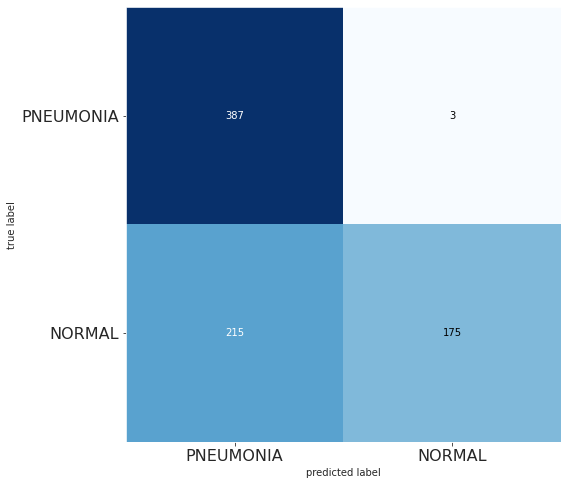

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Get the confusion matrix
cm  = confusion_matrix(labels_aug_test, labels_hog_aug_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.yticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.show()

###Classifcation Report of SVM


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_aug_test, labels_hog_aug_pred, target_names=['PNEUMONIA', 'NORMAL']))

              precision    recall  f1-score   support

   PNEUMONIA       0.64      0.99      0.78       390
      NORMAL       0.98      0.45      0.62       390

    accuracy                           0.72       780
   macro avg       0.81      0.72      0.70       780
weighted avg       0.81      0.72      0.70       780



#CNN Model with 6 layers

>  In this model we have first read and resized the images with CV2. The resulting dataset are saved in a npz file, which is used later for the training of CNN model. Loading the npz instead of reading the images directly each time we run the program will save us a lot of time. Make sure the npz file is in the same directory with the Jupiter notebook. For data augmentation, Undersampling is used, the result indicates that it is a useful strategy in improving the performance of the model.



> 



In [ ]:
import numpy as np
import torch  # Package name: torch (for pip), pytorch (for conda)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import cv2

def load_dataset():
    import os

    def load_data(directory):
        directories = (d for d in os.listdir(directory)
                       if os.path.isdir(os.path.join(directory, d)))
        labels = []
        images = []
        count_1 = 0
        count_2 = 0
        for d in directories:
            label_directory = os.path.join(directory, d)
            file_names = (os.path.join(label_directory, f)
                          for f in os.listdir(label_directory)
                          if f.endswith(".jpeg"))
            count_1 = count_1 + 1
            for f in file_names:
                images.append(cv2.imread(f, cv2.IMREAD_GRAYSCALE))
                if d == "NORMAL":
                    labels.append(0)
                elif d == "PNEUMONIA":
                    labels.append(1)
                count_2 = count_2 + 1
        images, labels = np.array(images), np.array(labels)
        images = np.array([cv2.resize(img, (50, 50)) for img in images])
        return images, labels 

    X_train, y_train = load_data('chest_xray/train')
    X_test, y_test = load_data('chest_xray/test')
    X_val, y_val = load_data('chest_xray/val')

    '''note that as the input image is greyscale, we have to add one dimension to the array representation of the 
    image(input channel is 1) so it can be later correctly processed by pytorch '''
    # np.savez('dataset.npz', X_train=X_train[..., np.newaxis], X_test=X_test[..., np.newaxis], X_val=X_val[..., np.newaxis], y_train=y_train, y_test=y_test, y_val=y_val)
    return X_train[..., np.newaxis], X_test[..., np.newaxis], X_val[..., np.newaxis], y_train, y_test, y_val


class BasicDataset(data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, idx):
        return dict(X=self.X[idx], y=self.y[idx])

    def __len__(self):
        return self.X.shape[0]


def train_image_classifier(model, dataset, learning_rate, batch_size, epochs, device):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        data_loader = data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)
        epoch_loss = 0.0

        for batch in data_loader:
            model.zero_grad()
            model.zero_grad()

            yhat = model.forward(batch['X'].float().to(device))

            batch_loss = F.cross_entropy(yhat, batch['y'].long().to(device))
            epoch_loss += batch_loss.item()

            batch_loss.backward()
            optimizer.step()

        if (epoch == 0) or (((epoch + 1) % 10) == 0):
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {epoch_loss}')

            
class ImageDataset(object):
    def __init__(self, X, y):
        self.X = np.moveaxis(X, -1, 1)
        self.y = y

    def __getitem__(self, idx):
        return dict(X=self.X[idx], y=self.y[idx])

    def __len__(self):
        return self.X.shape[0]


class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # I took the architecture from this CIFAR tutorial and only adjusted the width of the linear layer.
        # https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # You can figure out this number by printing the shape of the previous layer.
        self.fc1 = nn.Linear(16 * 9 * 9, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 62)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape) to figure out the size of your linear layer
        x = x.view(-1, 16 * 9 * 9)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Load training and testing data.
'''You can uncomment the line of code below to read the data directly, but it is not recommended as it will take a 
very long time, see the function load_dataset() to check how the original images are resized and saved as numpy array'''
# X_train, X_test, X_val, y_train, y_test, y_val = load_dataset()

dataset = np.load('dataset.npz')
X_train, X_test, X_val, y_train, y_test, y_val = dataset['X_train'], dataset['X_test'], dataset['X_val'], \
                                                 dataset['y_train'], dataset['y_test'], dataset['y_val']
print('Training samples:', X_train.shape[0])
print('Testing samples:', X_test.shape[0])
print('Image shape:', X_train[0].shape)
print('#Classes:', len(np.unique(y_train)))

Training samples: 5216
Testing samples: 624
Image shape: (50, 50, 1)
#Classes: 2


In [ ]:
# Training
device = torch.device('cuda')
cnn = CNN().to(device)
dataset = ImageDataset(X_train, y_train)
learning_rate = 0.005
batch_size = 256
epochs = 100
train_image_classifier(cnn, dataset, learning_rate, batch_size, epochs, device)

d:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1/100 - Loss: 51.454414546489716
Epoch 10/100 - Loss: 1.0653930380940437
Epoch 20/100 - Loss: 0.3174277297803201
Epoch 30/100 - Loss: 0.5307612037286162
Epoch 40/100 - Loss: 0.33054596494184807
Epoch 50/100 - Loss: 0.1766279524890706
Epoch 60/100 - Loss: 0.0005869783999514766
Epoch 70/100 - Loss: 0.00032407975322712446
Epoch 80/100 - Loss: 0.00020893043540581857
Epoch 90/100 - Loss: 0.00014561474381480366
Epoch 100/100 - Loss: 0.00010678852504497627


In [ ]:
# Evaluation
from sklearn.metrics import precision_recall_fscore_support

dataset_test = ImageDataset(X_test, y_test)

with torch.no_grad():
    X = torch.from_numpy(np.array([sample['X'] for sample in dataset_test])).float().to(device)
    yhat_unnormalized = cnn.forward(X).detach().cpu().numpy()

yhat = np.argmax(yhat_unnormalized, axis=1)
y = np.array([sample['y'] for sample in dataset_test])
prec, rec, f1, _ = precision_recall_fscore_support(y, yhat, average='weighted')

print(f'Precision: {prec:.03}')
print(f'Recall: {rec:.03}')
print(f'F1-score: {f1:.03}')

Precision: 0.805
Recall: 0.742
F1-score: 0.699


In [ ]:
# training and evaluation with data augmentation
'''above I have done the training and evaluation without data augmentation, below, I will repeat the process again 
but with data augmentation '''

print(np.unique(y_train, return_counts=True))
'''note the printed result above and with some simple testing, it is not difficult to see that the first 1341 samples are 
normal and the rest 3875 are pneumonia, my method of data augmentation is doing undersampling of the majority class'''
length_of_minority_class = 1341
X_pneumonia = X_train[length_of_minority_class:]
X_pneumonia_undersampled = np.zeros((length_of_minority_class, 50, 50, 1), dtype=float)
y_pneumonia_undersampled = np.zeros(length_of_minority_class, dtype=int)
import random
index_list = sorted(random.sample(range(3875), length_of_minority_class))

for i in range(length_of_minority_class):
    X_pneumonia_undersampled[i] = X_pneumonia[index_list[i]]
    y_pneumonia_undersampled[i] = 1

X_train_augmented = np.concatenate((X_train[:length_of_minority_class], X_pneumonia_undersampled), axis=0)
y_train_augmented = np.concatenate((y_train[:length_of_minority_class], y_pneumonia_undersampled), axis=0)
print('Training samples:', X_train_augmented.shape[0])
print('Testing samples:', X_test.shape[0])
print('Image shape:', X_train_augmented[0].shape)
print('#Classes:', len(np.unique(y_train_augmented)))

(array([0, 1]), array([1341, 3875], dtype=int64))
Training samples: 2682
Testing samples: 624
Image shape: (50, 50, 1)
#Classes: 2


In [ ]:
# Training
cnn = CNN().to(device)
dataset = ImageDataset(X_train_augmented, y_train_augmented)
learning_rate = 0.005
batch_size = 256
epochs = 100
train_image_classifier(cnn, dataset, learning_rate, batch_size, epochs, device)

Epoch 1/100 - Loss: 81.74185240268707
Epoch 10/100 - Loss: 3.217377334833145
Epoch 20/100 - Loss: 1.962774708867073
Epoch 30/100 - Loss: 1.6188807860016823
Epoch 40/100 - Loss: 1.1732525676488876
Epoch 50/100 - Loss: 0.8777704685926437
Epoch 60/100 - Loss: 0.8536972030997276
Epoch 70/100 - Loss: 0.6338348351418972
Epoch 80/100 - Loss: 0.5879975091665983
Epoch 90/100 - Loss: 0.3624602062627673
Epoch 100/100 - Loss: 0.33988139778375626


In [ ]:
# Evaluation
from sklearn.metrics import precision_recall_fscore_support

dataset_test = ImageDataset(X_test, y_test)

with torch.no_grad():
    X = torch.from_numpy(np.array([sample['X'] for sample in dataset_test])).float().to(device)
    yhat_unnormalized = cnn.forward(X).detach().cpu().numpy()

yhat = np.argmax(yhat_unnormalized, axis=1)
y = np.array([sample['y'] for sample in dataset_test])
prec, rec, f1, _ = precision_recall_fscore_support(y, yhat, average='weighted')

print(f'Precision: {prec:.03}')
print(f'Recall: {rec:.03}')
print(f'F1-score: {f1:.03}')

Precision: 0.832
Recall: 0.816
F1-score: 0.804


# CNN MODEL with 11 Layers

> In this model we have used More CNN layers along with Data Augumentation and Regularization techniques like drop out and batch normalization. In this we have achieved 97% accuracy in validation set and around 83% accuracy on the Test Set


---


> Resourcesused :

https://github.com/Bhard27/Pneumonia-Detection-using-Deep-Learning

https://www.youtube.com/watch?v=XI49ACP71Ck

https://www.kaggle.com/ligtfeather/x-ray-image-classification-using-pytorch

https://medium.com/@danny_68946/detecting-pneumonia-in-chest-x-rays-with-convolutional-neural-networks-729df4207432

https://www.youtube.com/watch?v=upo34AT1Cys

https://www.youtube.com/watch?v=zFA8Cm13Xmk

https://www.youtube.com/watch?v=zwHSQrNVNNE











In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.transforms as T
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
%matplotlib inline

## Read Data Set

In [ ]:
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/Dataset-Pneumonia/chest_xray' #for google collab
#DATA_DIR = 'Dataset-Pneumonia/chest_xray' #for local storage

TRAIN_DIR = DATA_DIR + '/train'                           # Contains training images
TEST_DIR = DATA_DIR + '/test'                             # Contains test images
VAL_DIR = DATA_DIR + '/val'                               # Contains test images

##Data augmentation

In [ ]:
img_dim = 256
train_tfms = T.Compose([
    T.RandomAffine(20),
    T.RandomHorizontalFlip(), 
    T.RandomRotation(10),
    T.Resize((img_dim,img_dim)),
    T.ToTensor(), 
])

valid_tfms = T.Compose([
    T.Resize((img_dim,img_dim)),
    T.ToTensor()
])

In [ ]:
train_ds = ImageFolder(TRAIN_DIR, train_tfms)
val_ds = ImageFolder(VAL_DIR, valid_tfms)
test_ds = ImageFolder(TEST_DIR, T.Compose([T.Resize((img_dim,img_dim)), T.ToTensor()]))
len(train_ds), len(val_ds), len(test_ds)

(5216, 16, 624)

In [ ]:
datasets = [train_ds, val_ds, test_ds]

In [ ]:
classes = train_ds.classes
classes

['NORMAL', 'PNEUMONIA']

In [ ]:
def show_sample(img, target, invert=True):
    if invert:
        plt.imshow(1 - img.permute((1, 2, 0)))
    else:
        plt.imshow(img.permute(1, 2, 0))
    print('Labels:', classes[target])

Labels: PNEUMONIA


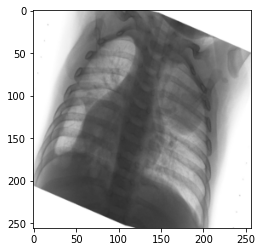

In [ ]:
show_sample(*train_ds[2900])

Labels: NORMAL


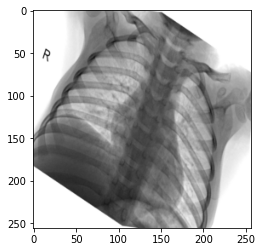

In [ ]:
show_sample(*train_ds[800])


Train
   PNEUMONIA  NORMAL
0       3875    1341
Val
   PNEUMONIA  NORMAL
0          8       8
Test
   PNEUMONIA  NORMAL
0        390     234


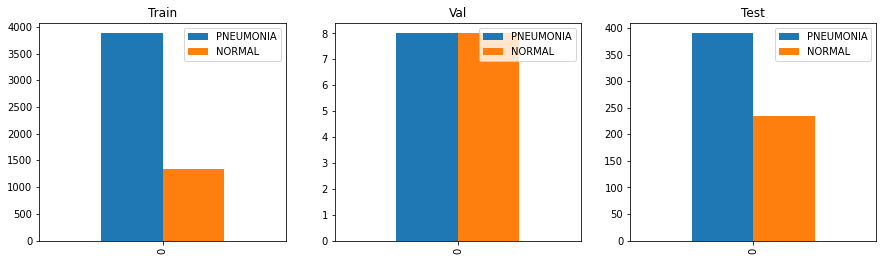

In [ ]:
ds_names = ['Train', 'Val', 'Test']
fig, ax = plt.subplots(1, 3, figsize=(15,4))

for i in range(0, len(datasets)):
  targets = pd.Series(datasets[i].targets)
  targets = targets.value_counts()
  df = pd.DataFrame(targets)
  df = df.T
  df.rename(columns={1: 'PNEUMONIA', 0: 'NORMAL'}, inplace=True)
  df.plot.bar(ax=ax[i])
  ax[i].set_title(ds_names[i])
  print(ds_names[i])
  print(df)

## Validation Set Increase

As Validation set is very small , We will increase the validation set by splitting the traing set 80 to 20 

In [ ]:
df = pd.DataFrame({
  'source': np.full(len(train_ds), 't'),
  'index' : np.arange(len(train_ds))
})

for i in range(len(val_ds)):
  row = pd.Series({
    'source': 'v',
    'index' : i
  })
  row.name = len(train_ds) + i + 1
  df = df.append(row)

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2)
len(train_df), len(val_df)

(4185, 1047)

In [ ]:
class DataFrameDataSet(Dataset):
    """Wrap a dataloader to move data to a device"""
    def __init__(self, name, df, train_ds, val_ds):
        self.name = name
        self.df = df
        self.train_ds = train_ds
        self.val_ds = val_ds
        
    def __getitem__(self, index):
        row = self.df.iloc[index]
        if row['source'] == 't':
          #print('t', index, self.train_ds[row['index']][1])
          return (self.train_ds[row['index']][0], self.train_ds[row['index']][1])
          #return self.train_ds[row['index']][0], 4
        else:
          #print('v', index, self.val_ds[row['index']][1])
          return (self.val_ds[row['index']][0], self.val_ds[row['index']][1])
          #return self.val_ds[row['index']][0], 5

    def __len__(self):
        """Number of batches"""
        #print(f'{self.name} df length: {len(self.df)}')
        return len(self.df)

In [ ]:
val_df_ds = DataFrameDataSet('val_df_ds', val_df, train_ds, val_ds)
train_df_ds = DataFrameDataSet('train_df_ds', train_df, train_ds, val_ds)

len(train_df_ds), len(val_df_ds)

(4185, 1047)

##Training Set Unbalance Fixing

Unblanced class within training set as pneumoia images are more and normal are less, we use PyTorch's WeightedRandomSampler that each batch from the dataloader has a proportional number of all classes.

In [ ]:
labels = []

for index, row in train_df.iterrows():
  if row['source'] == 't':
    labels.append(train_ds[row['index']][1])
  else:
    labels.append(val_ds[row['index']][1])  #takes around 20 minutes

In [ ]:
label_counts = pd.Series(labels)
label_counts.value_counts()

1    3109
0    1076
dtype: int64

In [ ]:
class_counts = [1075, 3110]
num_samples = sum(class_counts)

In [ ]:
class_weights = [1/class_counts[i] for i in range(len(class_counts))]
weights = [class_weights[labels[i]] for i in range(num_samples)]

In [ ]:
sampler = WeightedRandomSampler(weights, len(weights))

In [ ]:
batch_size = 32

In [ ]:
torch.manual_seed(500)

In [ ]:
train_dl = DataLoader(train_df_ds, batch_size, num_workers=2, sampler=sampler, pin_memory=True)
val_dl = DataLoader(val_df_ds, batch_size*2, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

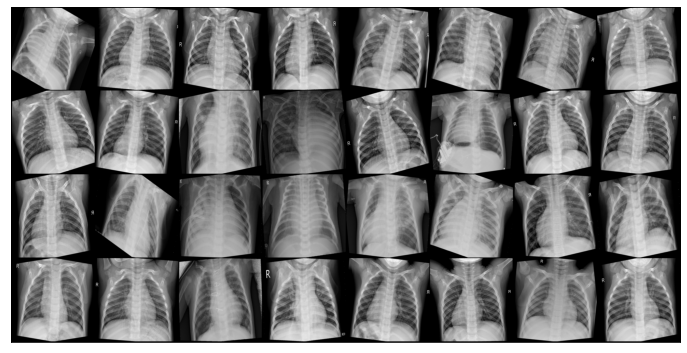

In [ ]:
show_batch(train_dl)

In [ ]:
def F_score(output, label, threshold=0.5, beta=1):
    prob = output > threshold
    label = label > threshold

    TP = (prob & label).sum(1).float()
    TN = ((~prob) & (~label)).sum(1).float()
    FP = (prob & (~label)).sum(1).float()
    FN = ((~prob) & label).sum(1).float()

    precision = torch.mean(TP / (TP + FP + 1e-12))
    recall = torch.mean(TP / (TP + FN + 1e-12))
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)
    return F2.mean(0)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationCNN(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

## CNN MODEL

In this model , we have used 11 layer along with regularization techniques such as drop out and batch normalization. The dropout layers randomly drop a node’s output data from progressing to the next layer and the normalization normalizes the outputs from a layer so that certain node having weights much higher than other nodes do not drown out the other nodes.

In [ ]:
class CNN11(ImageClassificationCNN):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),

            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.Dropout2d(p=0.2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.MaxPool2d(3, 3),
            
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.MaxPool2d(3, 3),
            nn.Dropout2d(p=0.2),
            nn.ReLU(),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.MaxPool2d(3, 3),
            nn.ReLU(),
            
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.MaxPool2d(3, 3),
            nn.ReLU(),
            
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(3, 3),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),

            nn.Flatten(), 
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout2d(p=0.3),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout2d(p=0.3),
            nn.Linear(64, 2),
            nn.Sigmoid()
        )
        
    def forward(self, xb):
        return self.network(xb)
  

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

In [ ]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

## Training CNN Model

In [ ]:
epochs = 5
max_lr = 1e-4
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
model = to_device(CNN11(), device);
model

CNN11(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Dropout2d(p=0.2, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (13): ReLU()
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, mo

In [ ]:
history = [evaluate(model, val_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'val_acc': 0.26238811016082764, 'val_loss': 0.6956593990325928}]

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)


Epoch [0], last_lr: 0.00008, train_loss: 0.5681, val_loss: 0.4544, val_acc: 0.8662



Epoch [1], last_lr: 0.00010, train_loss: 0.4528, val_loss: 0.3941, val_acc: 0.9458



Epoch [2], last_lr: 0.00006, train_loss: 0.4058, val_loss: 0.3803, val_acc: 0.9531



Epoch [3], last_lr: 0.00002, train_loss: 0.3933, val_loss: 0.3735, val_acc: 0.9513



Epoch [4], last_lr: 0.00000, train_loss: 0.3813, val_loss: 0.3607, val_acc: 0.9715
CPU times: user 1min 28s, sys: 56.5 s, total: 2min 24s
Wall time: 31min 30s


In [ ]:
train_time = '31min 30s'

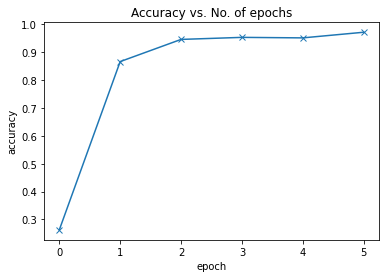

In [ ]:
plot_accuracies(history)

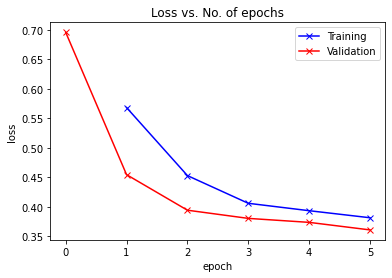

In [ ]:
plot_losses(history)

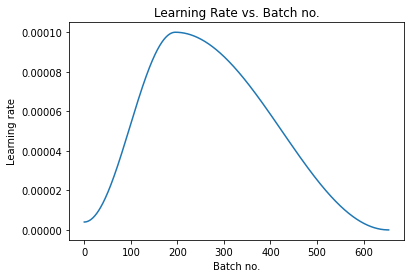

In [ ]:
plot_lrs(history)

## Evaluation and Predictions

In [ ]:
evaluate(model, test_dl)

{'val_acc': 0.8182291984558105, 'val_loss': 0.48807141184806824}

In [ ]:
test_acc = 0.8182291984558105
test_loss = 0.48807141184806824

**Predictions**

In [ ]:
def predict_image(img_data, model):
  img, label = img_data
  xb = to_device(img.unsqueeze(0), device)
  yb = model(xb)
  _, preds  = torch.max(yb, dim=1)
  plt.imshow(img[0], cmap='gray')
  print('Label:', classes[label], ', Predicted:', classes[preds[0].item()])

Label: PNEUMONIA , Predicted: PNEUMONIA


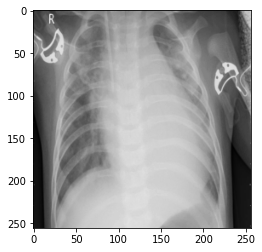

In [ ]:
predict_image(test_ds[400], model)

Label: NORMAL , Predicted: NORMAL


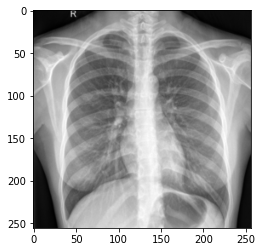

In [ ]:
predict_image(test_ds[10], model)

Label: NORMAL , Predicted: PNEUMONIA


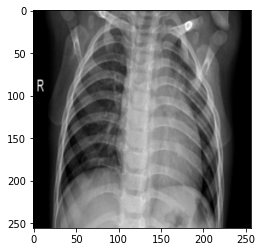

In [ ]:
predict_image(test_ds[200], model)

Label: PNEUMONIA , Predicted: PNEUMONIA


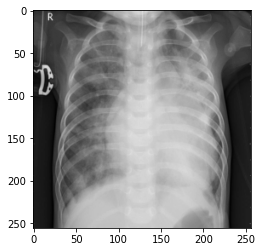

In [ ]:
predict_image(test_ds[350], model)

Label: NORMAL , Predicted: NORMAL


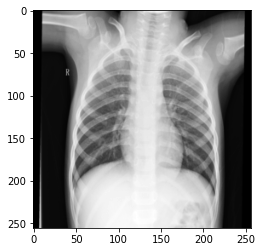

In [ ]:
predict_image(test_ds[110], model)

In [ ]:
pred_matrix = np.zeros((2,2))
test_index = 0
for i in range(len(test_ds)):
  image, label = test_ds[i]
  xb = image.unsqueeze(0)
  xb = to_device(xb, device)
  preds = model(xb)
  value, prediction = preds[0].max(0)
  pred_matrix[label][prediction.item()] = pred_matrix[label][prediction.item()]  + 1

In [ ]:
pred_matrix

array([[123., 111.],
       [  5., 385.]])

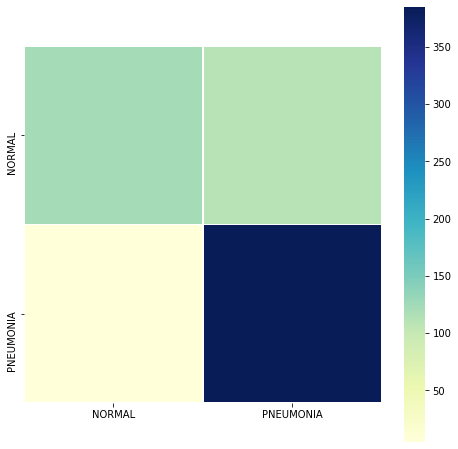

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))   
sns.heatmap(pred_matrix, linewidth=0.5, square=True,  cmap="YlGnBu", ax=ax, xticklabels=classes, yticklabels=classes)
plt.show()